In [2]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

start_date='2010-04-20'
start_date='2010-04-27'
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [5]:
Station = Base.classes.station
Measurement = Base.classes.measurement


In [6]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
session = Session(engine)

id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER
id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
precipitation_data=session.query(Measurement.date,Measurement.prcp,Measurement.tobs ).filter(Measurement.date>'2016-08-23').all()








In [8]:
df = pd.DataFrame(precipitation_data)
df=df.set_index(df['date'])[['prcp','tobs']]
df.head()

,prcp,tobs
date,,
2016-08-24,0.08,79
2016-08-25,0.08,80
2016-08-26,0.00,79
2016-08-27,0.00,77
2016-08-28,0.01,78


In [9]:
df['prcp'].plot(kind='bar')


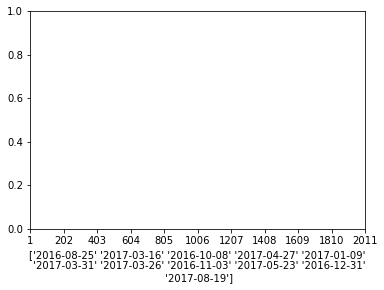

In [36]:
import numpy as np
plt.xticks(np.arange(1,len(df),int(len(df)/10)))
plt.xlabel(df.iloc[np.arange(1,len(df),int(len(df)/10))].index.values)

plt.show()


In [32]:
df.iloc[np.arange(1,len(df),int(len(df)/10))].index.values
    

array(['2016-08-25', '2017-03-16', '2016-10-08', '2017-04-27',
       '2017-01-09', '2017-03-31', '2017-03-26', '2016-11-03',
       '2017-05-23', '2016-12-31', '2017-08-19'], dtype=object)

In [29]:
np.arange(1,len(df),int(len(df)/10))

array([   1,  202,  403,  604,  805, 1006, 1207, 1408, 1609, 1810, 2011])